# 第6章　使用 `scikit-learn` 构建模型

## 任务6.4　构建并评价回归模型

<br>
<center>
    <b>代码6-24　使用<code>sklearn</code>估计器构建线性回归模型</b>
</center>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X = boston['data']
Y = boston['target']
names = boston['feature_names']
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=125)
clf = LinearRegression().fit(X_train, Y_train)
print('建立的线性回归模型为：', clf, sep='\n')

建立的线性回归模型为：
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [2]:
y_pred = clf.predict(X_test)
print('预测前20个结果为：', y_pred[:20], sep='\n')

预测前20个结果为：
[21.16289134 19.67630366 22.02458756 24.61877465 14.44016461 23.32107187
 16.64386997 14.97085403 33.58043891 17.49079058 25.50429987 36.60653092
 25.95062329 28.49744469 19.35133847 20.17145783 25.97572083 18.26842082
 16.52840639 17.08939063]


<br>
<center>
    <b>代码6-25　回归结果可视化</b>
</center>

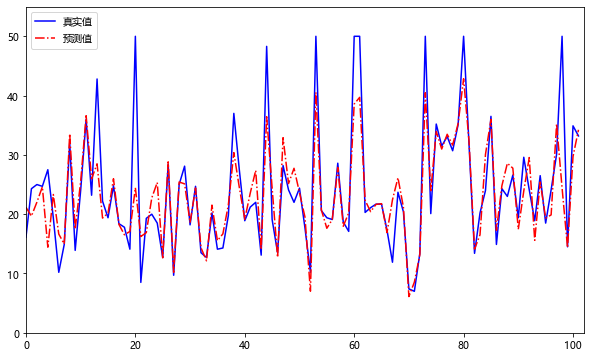

In [3]:
%matplotlib inline
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'Microsoft YaHei'
fig = pyplot.figure(figsize=(10, 6))
pyplot.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth=1.5, linestyle='-')
pyplot.plot(range(Y_test.shape[0]), y_pred, color='red', linewidth=1.5, linestyle='-.')
pyplot.xlim((0, 102))
pyplot.ylim((0, 55))
pyplot.legend(['真实值', '预测值'])
pyplot.savefig('img/线性回归结果.svg')
pyplot.show()

<br>
<center>
    <b>代码6-26　回归模型评价</b>
</center>

In [4]:
from sklearn.metrics import (
    explained_variance_score, mean_absolute_error,
    mean_squared_error, median_absolute_error, r2_score
)
print('Boston数据线性回归模型的平均绝对误差为：', mean_absolute_error(Y_test, y_pred))
print('Boston数据线性回归模型的均方误差为：', mean_squared_error(Y_test, y_pred))
print('Boston数据线性回归模型的中值绝对误差为：', median_absolute_error(Y_test, y_pred))
print('Boston数据线性回归模型的可解释方差值为：', explained_variance_score(Y_test, y_pred))
print('Boston数据线性回归模型的R²值为：', r2_score(Y_test, y_pred))

Boston数据线性回归模型的平均绝对误差为： 3.3775517360082032
Boston数据线性回归模型的均方误差为： 31.15051739031563
Boston数据线性回归模型的中值绝对误差为： 1.7788996425420773
Boston数据线性回归模型的可解释方差值为： 0.710547565009666
Boston数据线性回归模型的R²值为： 0.7068961686076838


<br>
<center>
    <b>代码6-27　使用<code>sklearn</code>估计器构建线性回归模型</b>
</center>

In [5]:
import pandas
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
house = pandas.read_csv('data/cal_housing.data', sep=',', encoding='gbk')
house_data = house.iloc[:, :-1]
house_target = house.iloc[:, -1]
house_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms',
    'totalBedrooms', 'population', 'households', 'medianIncome'
]
(house_train, house_test, house_target_train, house_target_test) = train_test_split(
    house_data, house_target, test_size=0.2, random_state=42
)
GBR_house = GradientBoostingRegressor().fit(house_train, house_target_train)
print('建立的梯度提升回归模型为：', GBR_house, sep='\n')

建立的梯度提升回归模型为：
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


<br>
<center>
    <b>代码6-28　评价构建线性回归模型</b>
</center>

In [6]:
house_target_pred = GBR_house.predict(house_test)
from sklearn.metrics import (
    explained_variance_score, mean_absolute_error,
    mean_squared_error, median_absolute_error, r2_score
)
print(
    'California_housing数据梯度提升回归树模型的平均绝对误差为：',
    mean_absolute_error(house_target_test, house_target_pred)
)
print(
    'California_housing数据梯度提升回归树模型的均方误差为：',
    mean_squared_error(house_target_test, house_target_pred)
)
print(
    'California_housing数据梯度提升回归树模型的中值绝对误差为：',
    median_absolute_error(house_target_test, house_target_pred)
)
print(
    'California_housing数据梯度提升回归树模型的可解释方差值为：',
    explained_variance_score(house_target_test, house_target_pred)
)
print(
    'California_housing数据梯度提升回归树模型的R²值为：',
    r2_score(house_target_test, house_target_pred)
)

California_housing数据梯度提升回归树模型的平均绝对误差为： 38056.63101887142
California_housing数据梯度提升回归树模型的均方误差为： 3103448401.564421
California_housing数据梯度提升回归树模型的中值绝对误差为： 26179.47844569836
California_housing数据梯度提升回归树模型的可解释方差值为： 0.761878115304136
California_housing数据梯度提升回归树模型的R²值为： 0.7618308289903613
